### 1. 데이터 준비

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('ggplot')
sns.set(font_scale=1.5) # 이 두줄은 본 필자가 항상 쓰는 방법입니다. matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 아이리스 데이터
from sklearn.datasets import load_iris

# 데이터를 나눠준다.
from sklearn.model_selection import train_test_split

# 모델
from sklearn.tree import DecisionTreeClassifier # 의사결정나무 모델
from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트 모델
from sklearn import svm # 서포트 벡터 머신 모델
from sklearn.linear_model import SGDClassifier # SGD Classifier 모델
from sklearn.linear_model import LogisticRegression # 로지스틱회귀 모델

from sklearn.metrics import accuracy_score # 정확도
from sklearn.metrics import classification_report # 분류 리포트

In [10]:
iris = load_iris()
print(type(dir(iris))) # dir()는 객체가 어떤 변수와 메서드를 가지고 있는지 나열함

<class 'list'>


In [11]:
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### 2. 데이터 확인

In [5]:
# iris 데이터의 key 확인해보기
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
# 데이터 크기 확인하기
iris_data = iris.data

print(iris_data.shape) # 총 150개의 행, 4개의 열을 가지고 있다.

(150, 4)


In [7]:
# 샘플 데이터 확인
iris_data[0] # 0번 인덱스

array([5.1, 3.5, 1.4, 0.2])

In [8]:
# feature_names 확인하기
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
# 타겟 출력해보기
iris_label = iris.target
print(iris_label.shape)
iris_label

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [42]:
# taget_names 확인하기
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [43]:
# 데이터셋 파일 저장 경로
iris.filename

'iris.csv'

### 판다스 이용 - 데이터 통계량 확인, 데이터 변환

In [44]:
# 데이터프레임에 아이리스 데이터 담아주기
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
# 데이터 정보확인
df.info()

# 간단 통계 확인
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [45]:
# 새로운 열(class_name) 추가 - (target 열의 각 원소에 해당하는 종을 매핑하여 추가)
df['target'] = iris['target']

df['class_name'] = df['target'].apply(lambda idx : iris['target_names'][idx])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class_name,sepal ratio,sepal size
0,5.1,3.5,1.4,0.2,0,setosa,1.457143,Large
1,4.9,3.0,1.4,0.2,0,setosa,1.633333,Small
2,4.7,3.2,1.3,0.2,0,setosa,1.468750,Small
3,4.6,3.1,1.5,0.2,0,setosa,1.483871,Small
4,5.0,3.6,1.4,0.2,0,setosa,1.388889,Large


In [48]:
# label 컬럼에 값이 균등하게 있는지 확인해보기
df['target'].value_counts().sort_index()

0    50
1    50
2    50
Name: target, dtype: int64

In [18]:
# 'species'가 'setosa'인 행들만 선택하여 새로운 데이터프레임 만들기
setosa_df = df[df['class_name'] == 'setosa']

setosa_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [19]:
# 그룹별 통계량 계산 - 각 품종('species')별로 'sepal length'의 평균을 계산하기
sepal_length_mean = df.groupby('class_name')['sepal length (cm)'].mean()

sepal_length_mean

class_name
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal length (cm), dtype: float64

In [20]:
# 새로운 열 추가 - 각 행의 'sepal length'와 'sepal width'의 합을 계산하여 새로운 열 'sepal sum'을 추가
sepal_length_mean = df.groupby('class_name')['sepal length (cm)'].mean()

sepal_length_mean

class_name
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal length (cm), dtype: float64

In [21]:
# 데이터 정렬 - 'petal length' 기준으로 데이터프레임을 내림차순으로 정렬
sorted_df = df.sort_values(by= 'petal length (cm)', ascending= False)

sorted_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class_name
118,7.7,2.6,6.9,2.3,2,virginica
122,7.7,2.8,6.7,2.0,2,virginica
117,7.7,3.8,6.7,2.2,2,virginica
105,7.6,3.0,6.6,2.1,2,virginica
131,7.9,3.8,6.4,2.0,2,virginica
...,...,...,...,...,...,...
16,5.4,3.9,1.3,0.4,0,setosa
35,5.0,3.2,1.2,0.2,0,setosa
14,5.8,4.0,1.2,0.2,0,setosa
13,4.3,3.0,1.1,0.1,0,setosa


In [22]:
# 특정 값 세기 - 각 품종('species')별로 몇 개의 샘플이 있는지 세어보기
species_counts = df['class_name'].value_counts()

species_counts

setosa        50
versicolor    50
virginica     50
Name: class_name, dtype: int64

In [23]:
# 데이터 결합 - 'sepal length'와 'petal length'의 평균을 계산한 후, 이를 새로운 데이터프레임으로 결합하기
# 평균 계산
sepal_length_mean = df['sepal length (cm)'].mean()
petal_length_mean = df['petal length (cm)'].mean()

# 데이터프레임으로 변환
mean_df = pd.DataFrame({
   'Mean Sepal Length': [sepal_length_mean],
   'Mean Petal Length': [petal_length_mean]
})

mean_df

,Mean Sepal Length,Mean Petal Length
0,5.843333,3.758


In [24]:
# 피벗 테이블 - 각 품종별 'sepal length'와 'petal length'의 평균을 피벗 테이블로 만들기
pivot_table = df.pivot_table(index='class_name', values=['sepal length (cm)', 'petal length (cm)'], aggfunc='mean')

pivot_table

,petal length (cm),sepal length (cm)
class_name,,
setosa,1.462,5.006
versicolor,4.260,5.936
virginica,5.552,6.588


In [25]:
# 'sepal width' 열에 임의로 결측값을 10개 추가하고, 결측값을 처리

# 결측값 추가
df_with_nan = df.copy()
df_with_nan.loc[np.random.choice(df_with_nan.index, 10), 'sepal width (cm)'] = np.nan

# 추가 됐는지 확인
missing_values = df_with_nan.isna().sum()
missing_values

sepal length (cm)    0
sepal width (cm)     9
petal length (cm)    0
petal width (cm)     0
target               0
class_name           0
dtype: int64

In [28]:
# 방법 1: 평균값으로 대체
mean_sepal_width = df_with_nan['sepal width (cm)'].mean()
df_mean_imputed = df_with_nan.fillna(mean_sepal_width)

print("평균값 대체 결과:")
df_mean_imputed.head()

평균값 대체 결과:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class_name
0,5.1,3.500000,1.4,0.2,0,setosa
1,4.9,3.056028,1.4,0.2,0,setosa
2,4.7,3.200000,1.3,0.2,0,setosa
3,4.6,3.100000,1.5,0.2,0,setosa
4,5.0,3.600000,1.4,0.2,0,setosa


In [29]:
mean_sepal_width

3.0560283687943275

In [30]:
# 방법 2: 중앙값으로 대체
median_sepal_width = df_with_nan['sepal width (cm)'].median()
df_median_imputed = df_with_nan.fillna(median_sepal_width)

print("중앙값 대체 결과:")
df_median_imputed.head()

중앙값 대체 결과:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [31]:
median_sepal_width

3.0

In [32]:
# 확인 

# 평균값으로 대체한 데이터프레임의 'sepal width (cm)' 열 추출
sepal_width_mean = df_mean_imputed['sepal width (cm)']

# 중앙값으로 대체한 데이터프레임의 'sepal width (cm)' 열 추출
sepal_width_median = df_median_imputed['sepal width (cm)']

# 두 열을 비교하여 같은지 다른지 확인
comparison = sepal_width_mean.equals(sepal_width_median)

if comparison:
   print("두 데이터프레임의 'sepal width (cm)' 열의 값은 완전히 일치합니다.")
else:
   print("두 데이터프레임의 'sepal width (cm)' 열의 값은 일치하지 않습니다.")

두 데이터프레임의 'sepal width (cm)' 열의 값은 일치하지 않습니다.


In [33]:
# 데이터 변형 - 'sepal length'와 'sepal width'의 비율을 계산하여 새로운 열 'Sepal Ratio'를 추가
# 'sepal ratio' 열 추가
df['sepal ratio'] = df['sepal length (cm)'] / df['sepal width (cm)']

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class_name,sepal ratio
0,5.1,3.5,1.4,0.2,0,setosa,1.457143
1,4.9,3.0,1.4,0.2,0,setosa,1.633333
2,4.7,3.2,1.3,0.2,0,setosa,1.468750
3,4.6,3.1,1.5,0.2,0,setosa,1.483871
4,5.0,3.6,1.4,0.2,0,setosa,1.388889


In [34]:
# 특정 조건에 따른 새로운 열 생성 - 'sepal length'가 5.0 이상인 경우 'Large', 미만인 경우 'Small'을 값으로 가지는 새로운 열 'sepal size'를 생성하기

# 'sepal size' 열 추가
df['sepal size'] = np.where(df['sepal length (cm)'] >= 5.0, 'Large', 'Small')

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class_name,sepal ratio,sepal size
0,5.1,3.5,1.4,0.2,0,setosa,1.457143,Large
1,4.9,3.0,1.4,0.2,0,setosa,1.633333,Small
2,4.7,3.2,1.3,0.2,0,setosa,1.468750,Small
3,4.6,3.1,1.5,0.2,0,setosa,1.483871,Small
4,5.0,3.6,1.4,0.2,0,setosa,1.388889,Large


In [35]:
# 통계량 계산 - 품종(Species)별로 'sepal length'와 'sepal width'의 합계, 평균, 표준편차를 계산

# 품종별로 데이터 그룹화
grouped = df.groupby('class_name')

# 각 그룹별로 'sepal length'와 'sepal width'의 합계, 평균, 표준편차 계산
summary_stats = grouped.agg({
   'sepal length (cm)': ['sum', 'mean', 'std'],
   'sepal width (cm)': ['sum', 'mean', 'std']
})

# 결과 출력
summary_stats

sepal length (cm)                  sepal width (cm)         \
                         sum   mean       std              sum   mean   
class_name                                                              
setosa                 250.3  5.006  0.352490            171.4  3.428   
versicolor             296.8  5.936  0.516171            138.5  2.770   
virginica              329.4  6.588  0.635880            148.7  2.974   

                      
                 std  
class_name            
setosa      0.379064  
versicolor  0.313798  
virginica   0.322497

### 데이터 시각화

<Figure size 720x720 with 0 Axes>

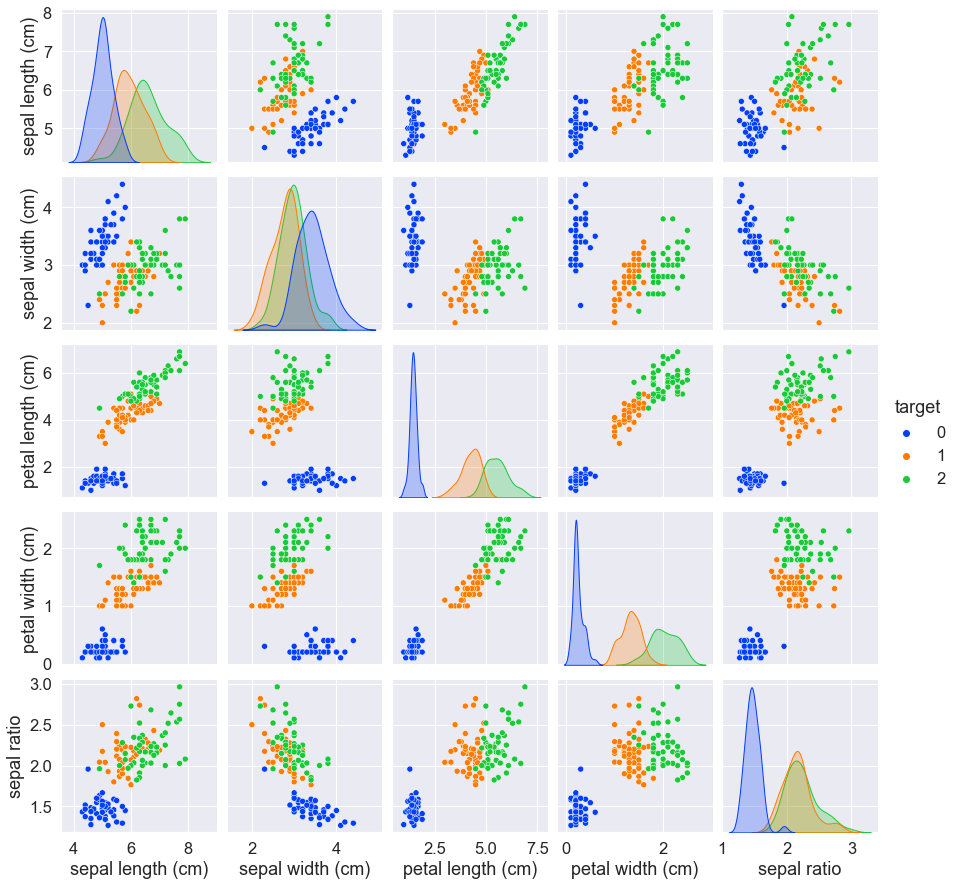

In [51]:
plt.figure(figsize=(10,10))

sns.pairplot(df, hue='target', palette='bright')

plt.show()

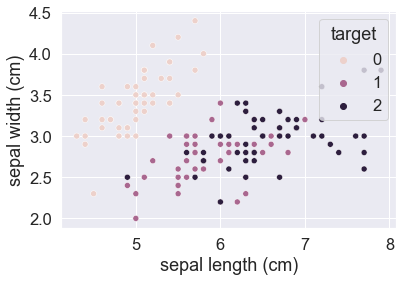

In [36]:
# 산점도 그리기
sns.scatterplot(x = 'sepal length (cm)', y = 'sepal width (cm)', data = df, hue = 'target')

plt.show()

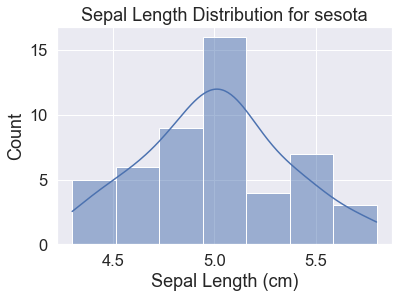

In [37]:
# 히스토그램 그리기

# 품종이 sesota(target = 0)인 행들만 필터링
filtered_data = df[df['target'] == 0]

# 히스토그램 그리기
sns.histplot(filtered_data['sepal length (cm)'], kde= True)
plt.title('Sepal Length Distribution for sesota')
plt.xlabel('Sepal Length (cm)')

# 그래프 보여주기
plt.show()

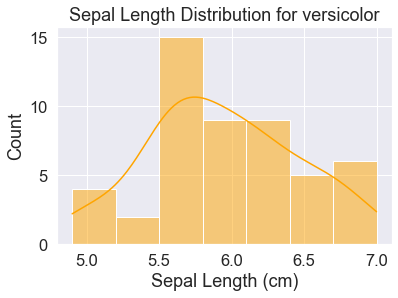

In [38]:
# 품종이 versicolor(target = 1)인 행들만 필터링
filtered_data = df[df['target'] == 1]

# 히스토그램 그리기
sns.histplot(filtered_data['sepal length (cm)'], kde= True, color = 'orange')
plt.title('Sepal Length Distribution for versicolor')
plt.xlabel('Sepal Length (cm)')

# 그래프 보여주기
plt.show()

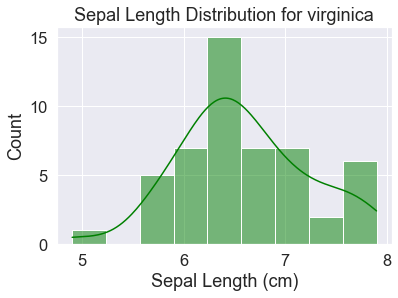

In [39]:
# 품종이 virginica(target = 2)인 행들만 필터링
filtered_data = df[df['target'] == 2]

# 히스토그램 그리기
sns.histplot(filtered_data['sepal length (cm)'], kde= True, color = 'green')
plt.title('Sepal Length Distribution for virginica')
plt.xlabel('Sepal Length (cm)')

# 그래프 보여주기
plt.show()

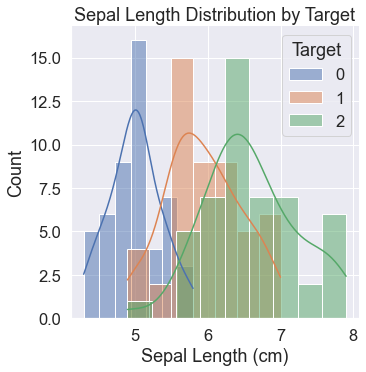

In [40]:
# 전부 합쳐서 그리기
hist = sns.FacetGrid(df, hue="target", height=5)
hist.map(sns.histplot, "sepal length (cm)", kde=True)

# 그래프 그리기
plt.title('Sepal Length Distribution by Target')
plt.xlabel('Sepal Length (cm)')
plt.legend(title='Target')

plt.show()

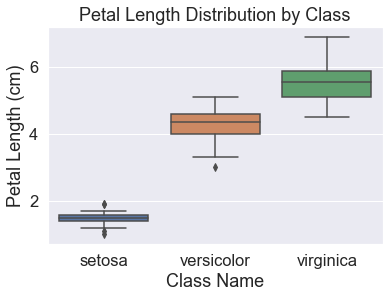

In [41]:
# 박스플롯 그리기
sns.boxplot(x='class_name', y='petal length (cm)', data=df)

plt.title('Petal Length Distribution by Class')
plt.xlabel('Class Name')
plt.ylabel('Petal Length (cm)')

plt.show()

### train, text 데이터 나누기

In [57]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, # input data(feature)
                                                    iris_label, # ouput data(label or target)
                                                    test_size=0.2, # 테스트셋의 비율(전체 중 20%, 기본값은 0.25)
                                                    stratify=iris.target, # 각 class들을 같은 비율로 나눠준다.
                                                    random_state=7) # random 시드값

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

X_train 개수:  120 , X_test 개수:  30


In [58]:
y_train, y_test # 0, 1, 2가 랜덤하게 섞여 있는 것을 확인할 수 있다.

(array([2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 2, 1, 2, 1, 0, 1, 0, 0, 1,
        0, 2, 1, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1, 2, 2, 0, 2, 2, 2, 2, 1, 1,
        0, 2, 0, 2, 0, 1, 1, 1, 1, 2, 1, 2, 0, 2, 0, 1, 1, 0, 2, 1, 1, 2,
        0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 2, 1, 1, 0, 1, 1, 2, 1, 0, 2, 0, 1, 1, 1, 2, 0, 2, 2, 2,
        0, 1, 2, 1, 2, 0, 0, 2, 1, 0]),
 array([2, 0, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 0,
        1, 0, 2, 2, 2, 1, 0, 2]))

In [53]:
# 나눈 데이터셋 확인
X_train.shape, y_train.shape

((120, 4), (120,))

In [54]:
X_test.shape, y_test.shape

((30, 4), (30,))

In [59]:
# 비율 확인하기
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0, 1, 2]), array([40, 40, 40]))
(array([0, 1, 2]), array([10, 10, 10]))


동일한 비율로 나눠지지 않을 때는 
train_test_split 메서드에 startify 파라미터를 사용하면 데이터의 각 클래스들을 같은 비율로 나눠준다.

### 3. 모델 구현
Decision Tree

In [60]:
# 모델 생성
decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

classifier


In [61]:
# 모델 학습
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

### 4. 검증

In [62]:
# test 데이터로 예측하기
y_pred = decision_tree.predict(X_test)
y_pred

array([2, 0, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 0,
       1, 0, 2, 2, 1, 1, 0, 2])

In [63]:
# 정답
y_test

array([2, 0, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 0,
       1, 0, 2, 2, 2, 1, 0, 2])

In [64]:
# 정확도(Accuracy)로 평가하기
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9333333333333333

정확도 = 예측한전체데이터의개수 / 예측결과가정답인데이터의개수

### 총정리

In [65]:
# 과정 한눈에 봐보기!
# (1) 필요한 모듈 import
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# (2) 데이터 준비
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

# (3) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, # input data(feature)
                                                    iris_label, # ouput data(label or target)
                                                    test_size=0.2, # 테스트셋의 비율(전체 중 20%, 기본값은 0.25)
                                                    stratify=iris.target, # 각 class들을 같은 비율로 나눠준다.
                                                    random_state=7) # random 시드값

# (4) 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print()

print(classification_report(y_test, y_pred))

0.9333333333333333

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



### 5. 다른 모델 활용
1. 랜덤포레스트

In [66]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, # input data(feature)
                                                    iris_label, # ouput data(label or target)
                                                    test_size=0.2, # 테스트셋의 비율(전체 중 20%, 기본값은 0.25)
                                                    stratify=iris.target, # 각 class들을 같은 비율로 나눠준다.
                                                    random_state=25) # random 시드값

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print()

print(classification_report(y_test, y_pred))

0.8666666666666667

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.75      0.90      0.82        10
           2       0.88      0.70      0.78        10

    accuracy                           0.87        30
   macro avg       0.88      0.87      0.87        30
weighted avg       0.88      0.87      0.87        30



2. Support Vector Machine (SVM)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, # input data(feature)
                                                    iris_label, # ouput data(label or target)
                                                    test_size=0.2, # 테스트셋의 비율(전체 중 20%, 기본값은 0.25)
                                                    stratify=iris.target, # 각 class들을 같은 비율로 나눠준다.
                                                    random_state=25) # random 시드값

svm_model = svm.SVC()

print(svm_model._estimator_type)

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print()

print(classification_report(y_test, y_pred))

classifier
1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



3. Stochastic Gradient Descent Classifier (SGDClassifier)

In [68]:
sgd_model = SGDClassifier()

print(sgd_model._estimator_type)

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print()

print(classification_report(y_test, y_pred))

classifier
0.9

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.70      0.82        10
           2       0.91      1.00      0.95        10

    accuracy                           0.90        30
   macro avg       0.91      0.90      0.90        30
weighted avg       0.91      0.90      0.90        30



4. Logistic Regression

In [70]:
logistic_model = LogisticRegression()

print(logistic_model._estimator_type)

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print()

print(classification_report(y_test, y_pred))

classifier
0.9

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

